In [1]:
import cv2
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
import numba
from numba import jit

In [3]:
import sys
sys.path.append('../')

In [4]:
from bbox_utils.bbox import generate_default_boxes

In [5]:
# Blue color in BGR
color = (255, 0, 0)
 
# Line thickness of 2 px
thickness = 1

In [86]:
feature_map_shapes = [38, 19, 10, 5, 3, 1]

aspect_ratios = [
    [1/2, 1.3],
    [1/2, 1/3],
    [1/2, 1/3],
    [1/2, 1/3],
    [1/2, 1/3],
    [1/2, 1/3]
]
angles = [-45, 0, 45, 90]

prior_boxes = generate_default_boxes(feature_map_shapes, 6, aspect_ratios, angles)

In [87]:
gt_box = [220.,  99.999999, 319.999999, 200.000001, 270.000001, 249.999999,  169.999999, 150.      ]

In [88]:
gt_box

[220.0,
 99.999999,
 319.999999,
 200.000001,
 270.000001,
 249.999999,
 169.999999,
 150.0]

In [89]:
prior_boxes[0]

[-0.02219744432248527,
 0.013157894736842101,
 0.013157894736842108,
 -0.02219744432248527,
 0.04851323379616948,
 0.013157894736842108,
 0.013157894736842101,
 0.04851323379616948]

0.5221510798697752
28200 [150.75378798 165.         225.          90.75378798 299.24621202
 165.         225.         239.24621202]
0.5304822618142555
28201 [172.5 112.5 277.5 112.5 277.5 217.5 172.5 217.5]
0.5221510798697753
28202 [225.          90.75378798 299.24621202 165.         225.
 239.24621202 150.75378798 165.        ]
0.5221510798697752
28203 [150.75378798 165.         225.          90.75378798 299.24621202
 165.         225.         239.24621202]
0.5304822618142555
28204 [172.5 112.5 277.5 112.5 277.5 217.5 172.5 217.5]
0.5221510798697753
28205 [225.          90.75378798 299.24621202 165.         225.
 239.24621202 150.75378798 165.        ]
0.5304822618142555
28206 [277.5 112.5 277.5 217.5 172.5 217.5 172.5 112.5]
0.6259062396933863
28207 [146.25 138.75 198.75  86.25 303.75 191.25 251.25 243.75]
0.6430308197538462
28211 [139.267859  122.1339295 182.1339295  79.267859  310.732141  207.8660705
 267.8660705 250.732141 ]
0.545912817981105
28350 [180.75378798 165.         255. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


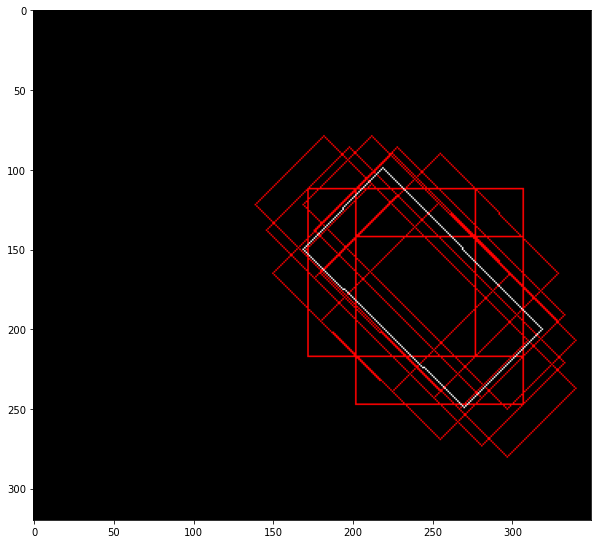

In [90]:
# image = np.zeros((300, 300, 3))

image = np.zeros((320, 350, 3))

gt_box = [220.,  99.999999, 319.999999, 200.000001, 270.000001, 249.999999,  169.999999, 150.      ]

gt_box = np.array(gt_box) / 300

gt_box = gt_box.reshape(4, 2)

prior_boxes= np.array(prior_boxes, dtype=np.float64)

for i in range(len(prior_boxes)):
    
    iou = getIOU(prior_boxes[i], gt_box)
    
    if iou > 0.5:
        print(iou)
    
        corners = np.array(prior_boxes[i]) * 300
        
        print(i, corners)

        corners = corners.astype(np.int32)

        corners = corners.reshape(4, 2)

        corners = corners.reshape((-1, 1, 2))

        image = cv2.polylines(image, [corners],
                              True, color, 1)

        
corners = np.array(gt_box) * 300

corners = corners.astype(np.int32)

corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image, [corners],
                      True, (255, 100, 100), 1)
        
plt.figure(figsize=(10,10))

plt.imshow(image)

In [92]:
getIOU(prior_boxes[28376], gt_box)

0.6430308141658765

In [18]:
def shoelaceFormula(coordinates):
    if len(coordinates) < 3:
        return np.float64(0)
    
    area = 0

    for i in range(len(coordinates)):
        i_plus_1 = (i + 1) % len(coordinates)
        area += (coordinates[i_plus_1][0] * coordinates[i][1] - coordinates[i][0] * coordinates[i_plus_1][1]) / 2

    return np.float64(abs(area))

In [35]:
gt_box = np.array(gt_box).reshape(4, 2)

In [46]:
len(default_box), len(gt_box)

(4, 4)

In [47]:
default_box = prior_boxes[32952].reshape(4, 2) * 300
    
clipped_polygon = clippedPolygon(gt_box, len(gt_box), default_box, len(default_box))

clipped_polygon

array([[181.05708883, 138.94291017],
       [220.        ,  99.999999  ],
       [318.94291117, 198.94291313],
       [318.94291117, 201.05708883],
       [270.000001  , 249.999999  ],
       [181.05708883, 161.0570895 ]])

In [48]:
gt_box

array([[220.      ,  99.999999],
       [319.999999, 200.000001],
       [270.000001, 249.999999],
       [169.999999, 150.      ]])

In [49]:
default_box_area = shoelaceFormula(default_box)
gt_box_area = shoelaceFormula(gt_box)
clipped_polygon_area = shoelaceFormula(clipped_polygon)

print(default_box_area)
print(gt_box_area)
print(clipped_polygon_area)

clipped_polygon_area / ( default_box_area + gt_box_area - clipped_polygon_area )

38025.00000000001
9999.999949999998
9876.623281523638


0.25890022444087674

In [50]:
default_box_area + gt_box_area - clipped_polygon_area

38148.37666847637

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


32952 [318.94291117  12.11417767 318.94291117 287.88582233 181.05708883
 287.88582233 181.05708883  12.11417767] 0.0


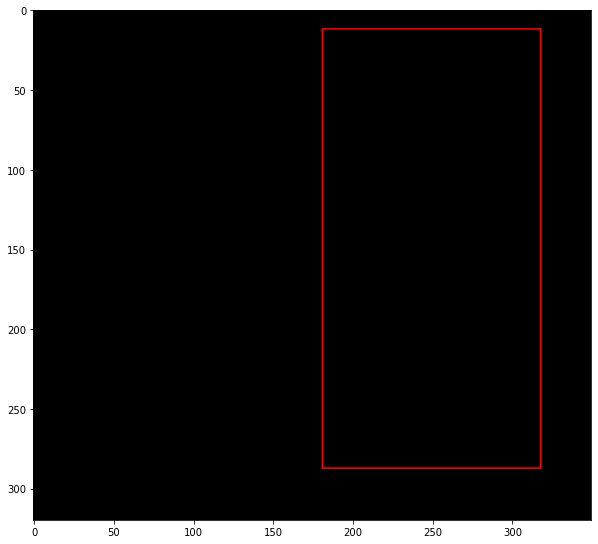

In [51]:
image = np.zeros((320, 350, 3))

i = 32952
corners = np.array(prior_boxes[i]) * 300
        
print(i, corners, getIOU(prior_boxes[32952], gt_box))

corners = corners.astype(np.int32)

corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image, [corners],
                      True, color, 1)

corners = np.array(gt_box) * 300

corners = corners.astype(np.int32)

corners = corners.reshape(4, 2)

corners = corners.reshape((-1, 1, 2))

image = cv2.polylines(image, [corners],
                      True, (255, 100, 100), 1)
        
plt.figure(figsize=(10,10))

plt.imshow(image)

In [52]:
print(prior_boxes[32952], gt_box)

[1.06314304 0.04038059 1.06314304 0.95961941 0.60352363 0.95961941
 0.60352363 0.04038059] [[220.        99.999999]
 [319.999999 200.000001]
 [270.000001 249.999999]
 [169.999999 150.      ]]


In [53]:
np.array(gt_box).reshape(-1)

array([220.      ,  99.999999, 319.999999, 200.000001, 270.000001,
       249.999999, 169.999999, 150.      ])